In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-bike-share-train-evaluate-regression-model/__results__.html
/kaggle/input/daily-bike-share-train-evaluate-regression-model/daily-bike-share.csv
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__resultx__.html
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__notebook__.ipynb
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__output__.json
/kaggle/input/daily-bike-share-train-evaluate-regression-model/custom.css
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__results___files/__results___14_3.png
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__results___files/__results___14_1.png
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__results___files/__results___14_0.png
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__results___files/__results___10_0.png
/kaggle/input/daily-bike-share-train-evaluate-regression-model/__results___files/__results___16_2.png
/kaggle/inp

In [2]:
data = pd.read_csv("/kaggle/input/daily-bike-share-train-evaluate-regression-model/daily-bike-share.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
data['day'] = pd.DatetimeIndex(data['dteday']).day
data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [4]:
numerical_col = ['temp','atemp','hum','windspeed']
data[numerical_col + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


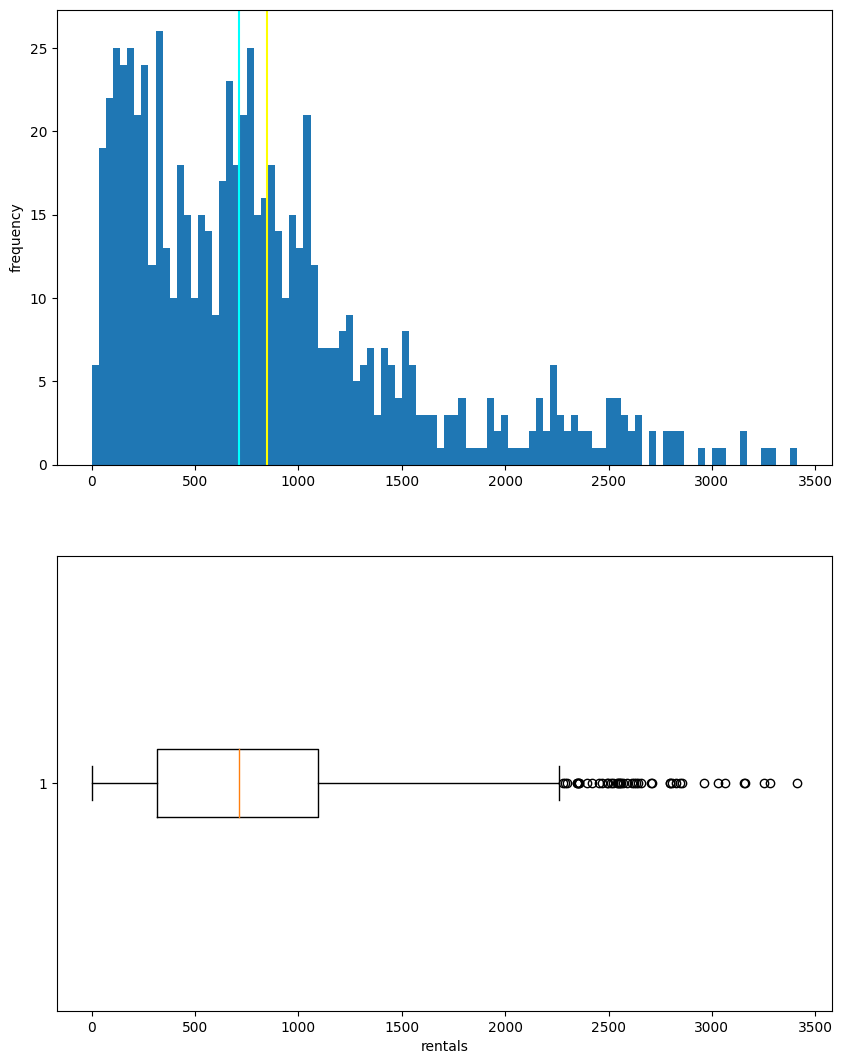

In [5]:
#label column
label = data['rentals']


fig, ax = plt.subplots(2,1,figsize = (10,13))

ax[0].hist(label, bins = 100)
ax[0].set_ylabel("frequency")

ax[0].axvline(label.mean(),color = 'yellow')
ax[0].axvline(label.median(), color = 'cyan')

ax[1].boxplot(label, vert = False)
ax[1].set_xlabel("rentals")

fig.show()

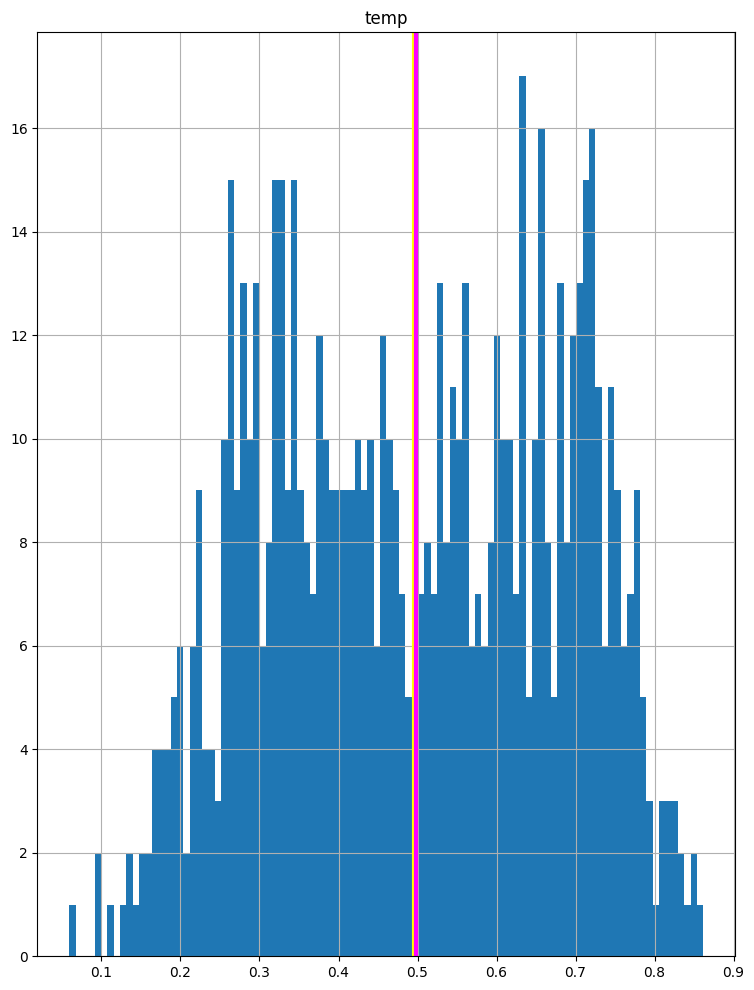

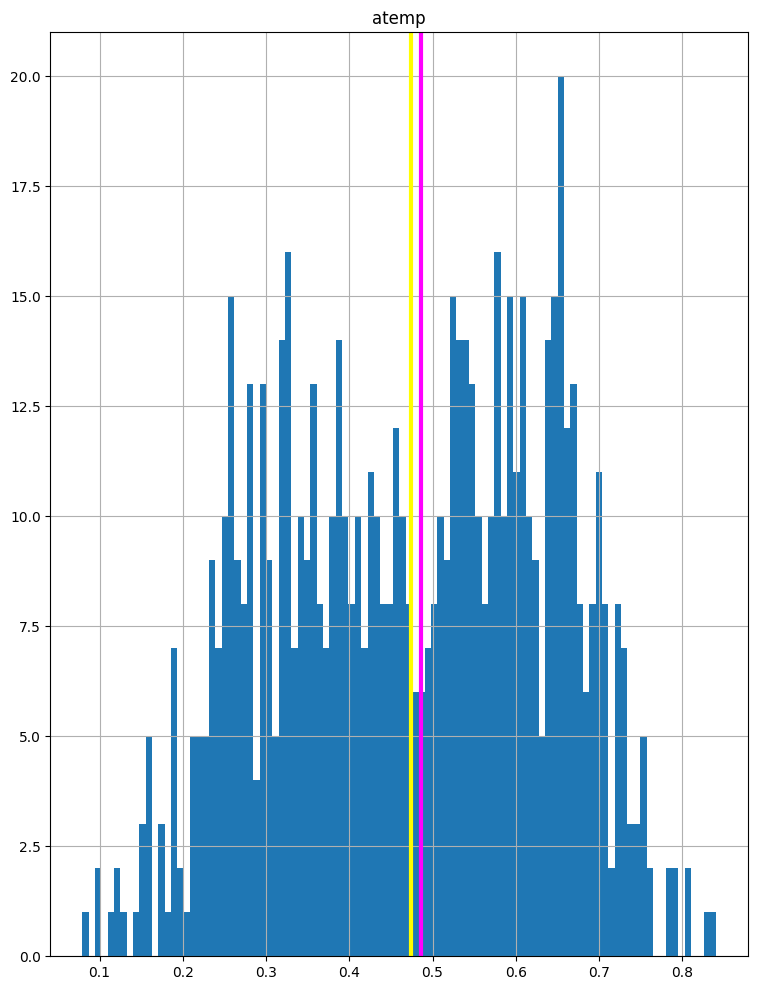

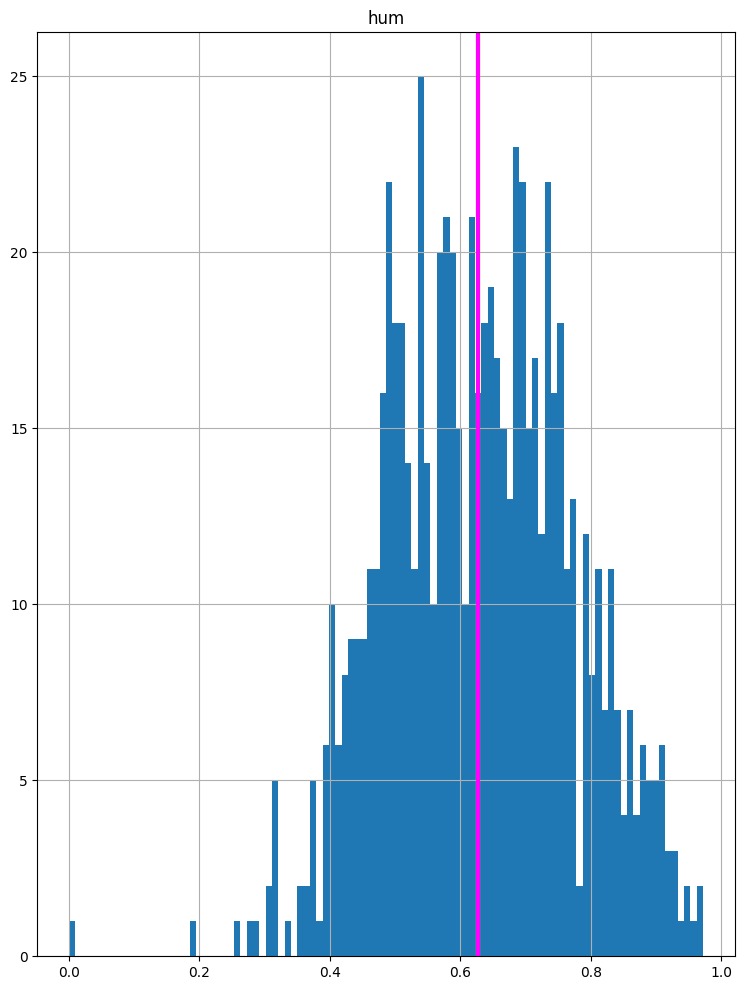

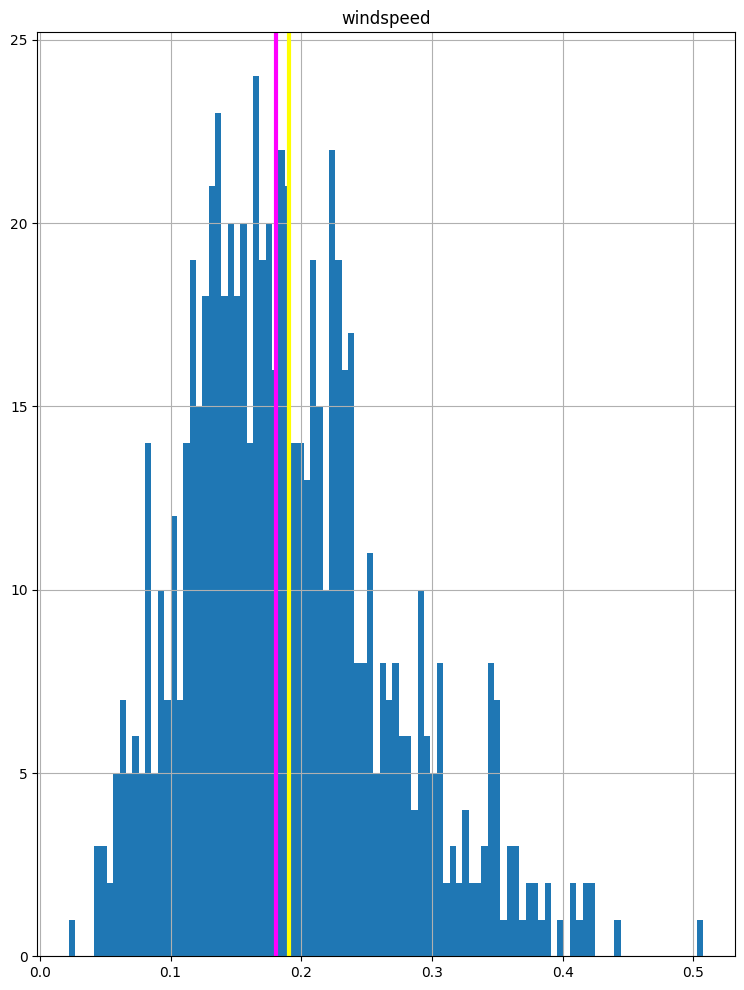

In [6]:
for col in numerical_col:
    fig = plt.figure(figsize = (9,12))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins = 100,ax = ax)
    ax.axvline(feature.mean(),color='yellow', linewidth = 3)
    ax.axvline(feature.median(),color='magenta',linewidth = 3 )
    ax.set_title(col)
    fig.show()
    

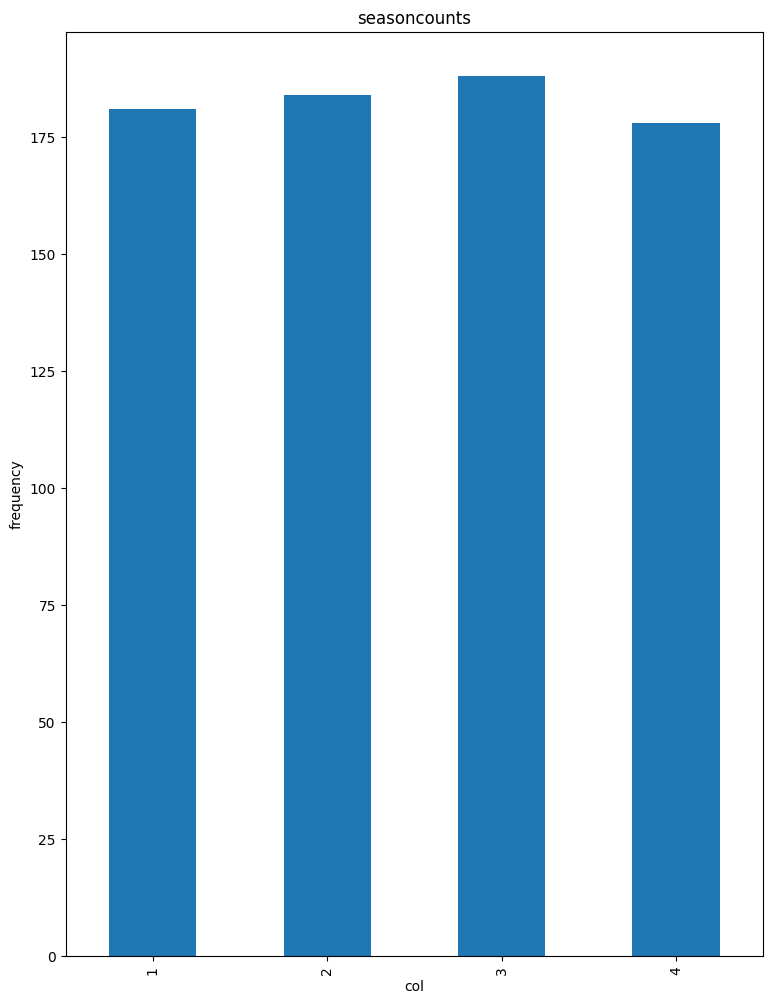

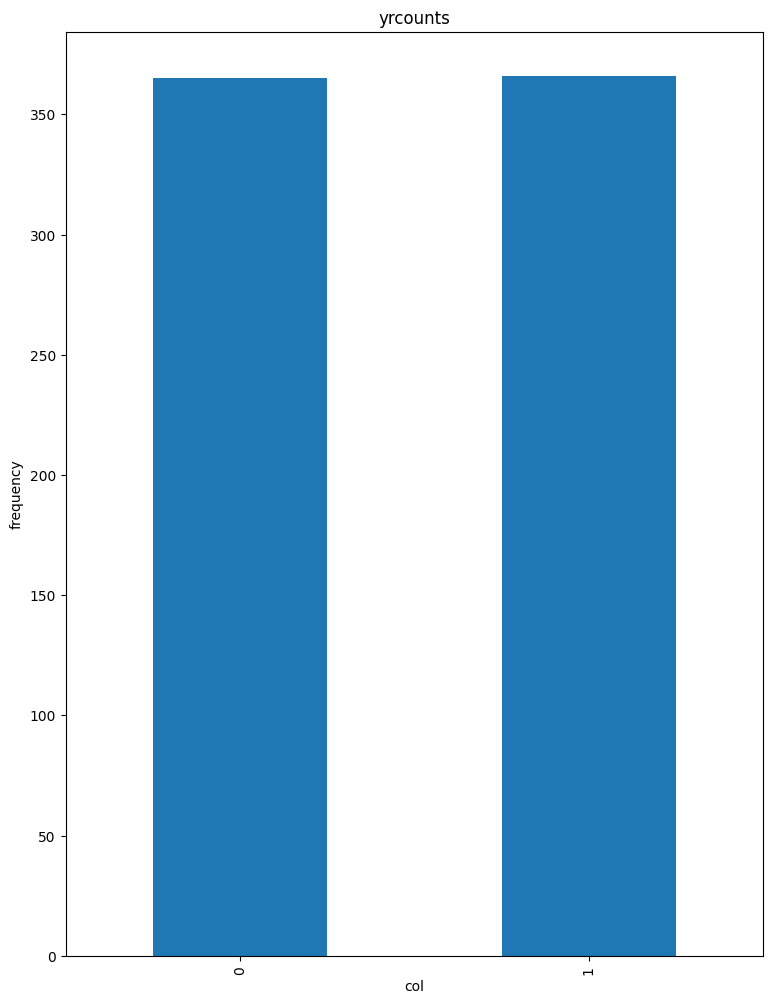

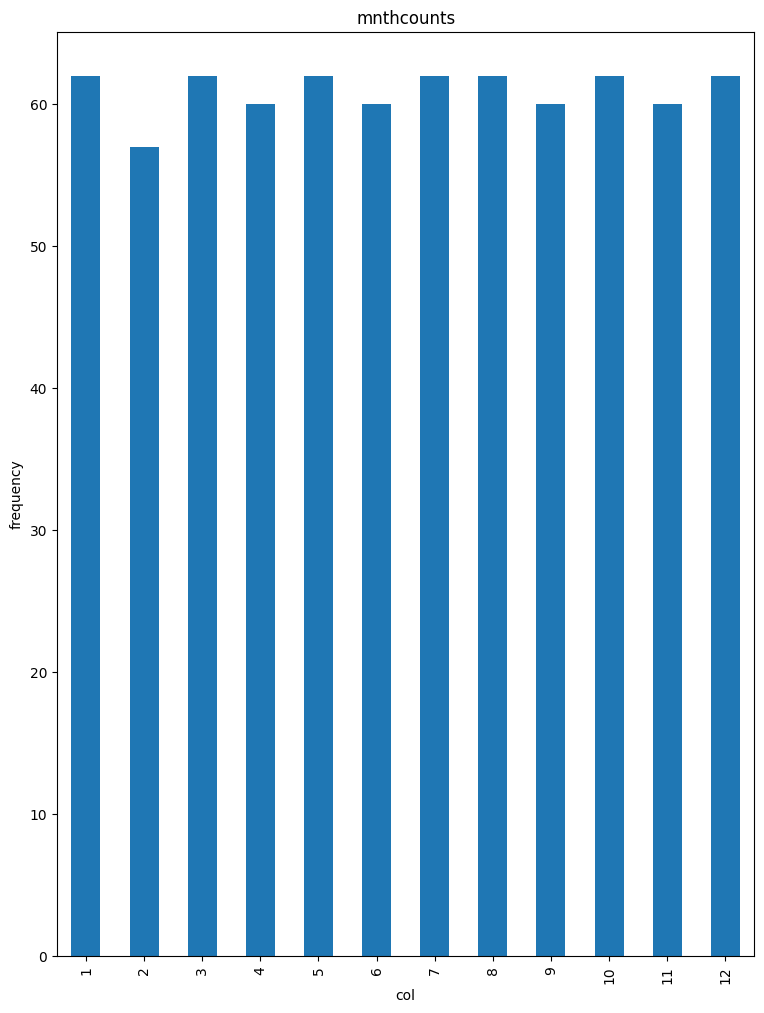

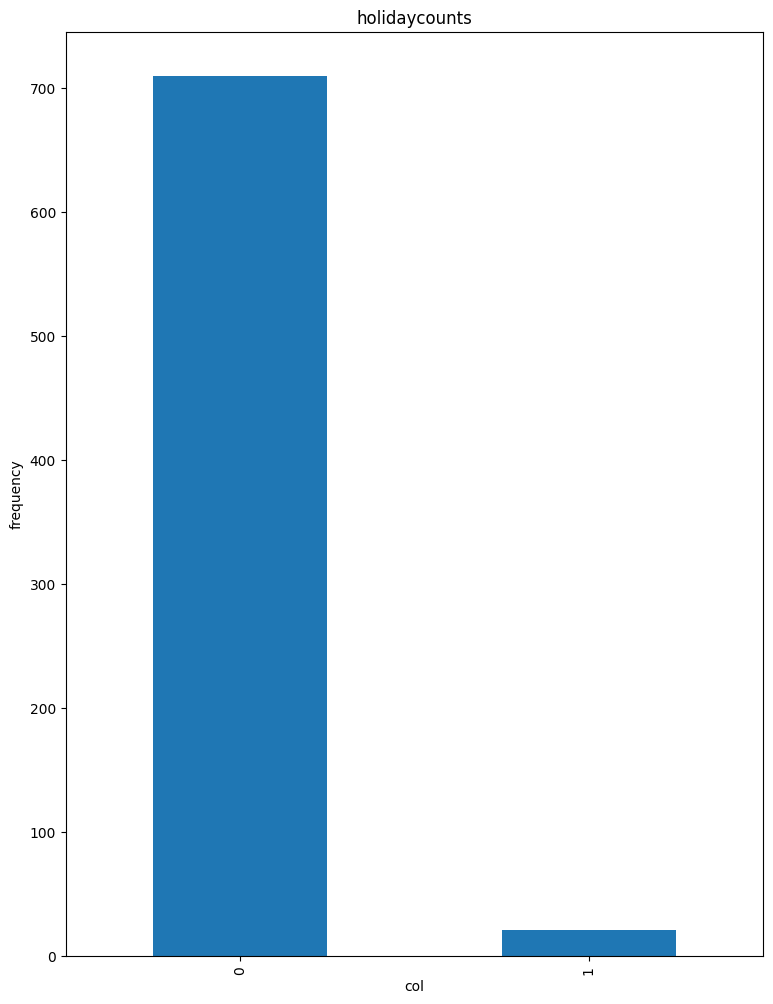

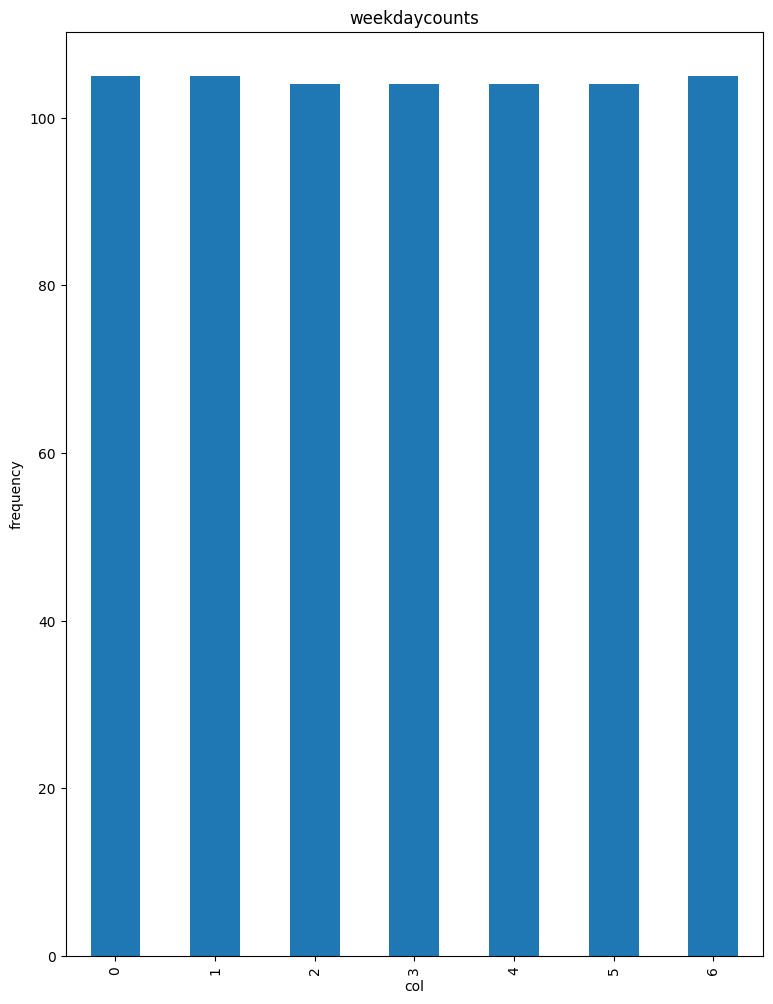

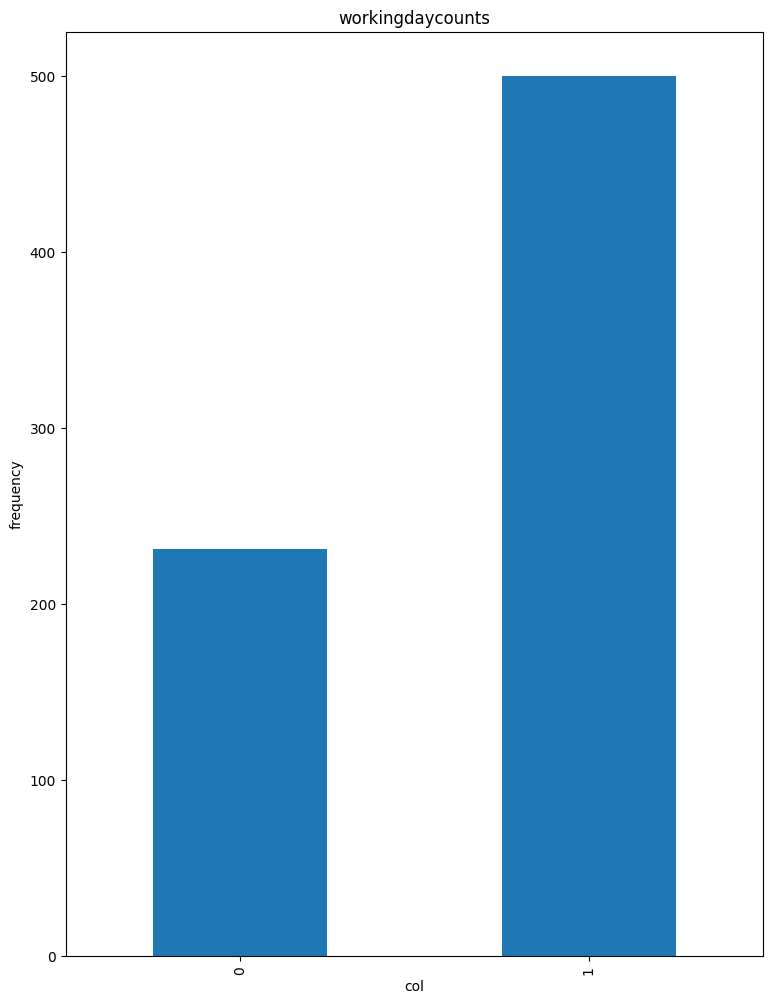

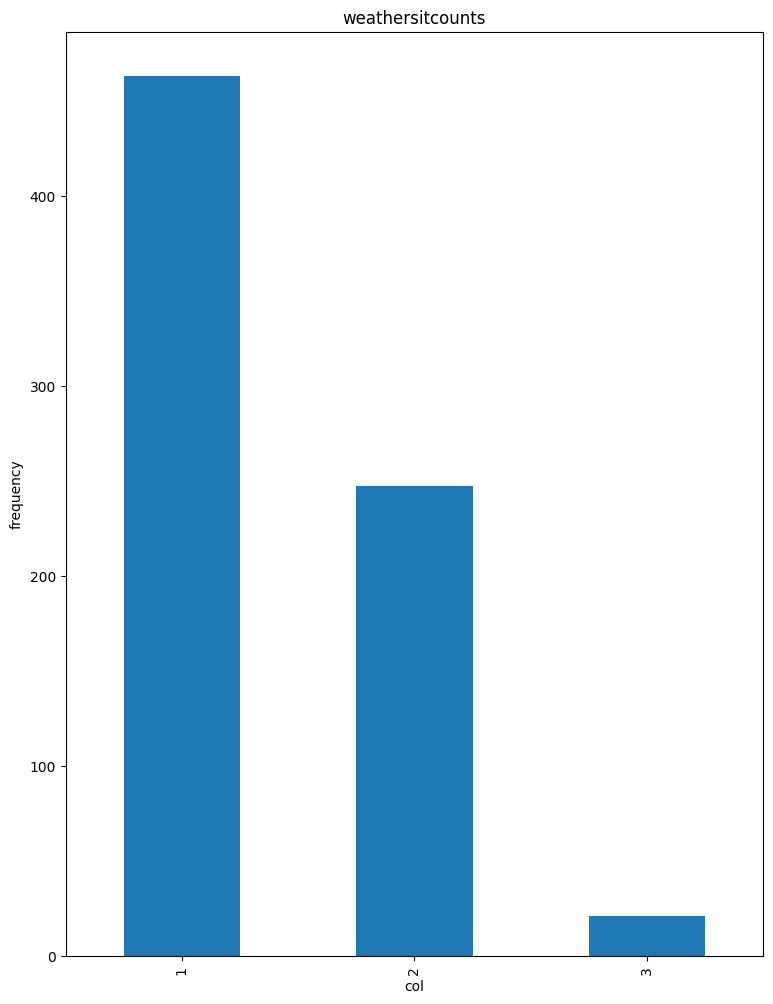

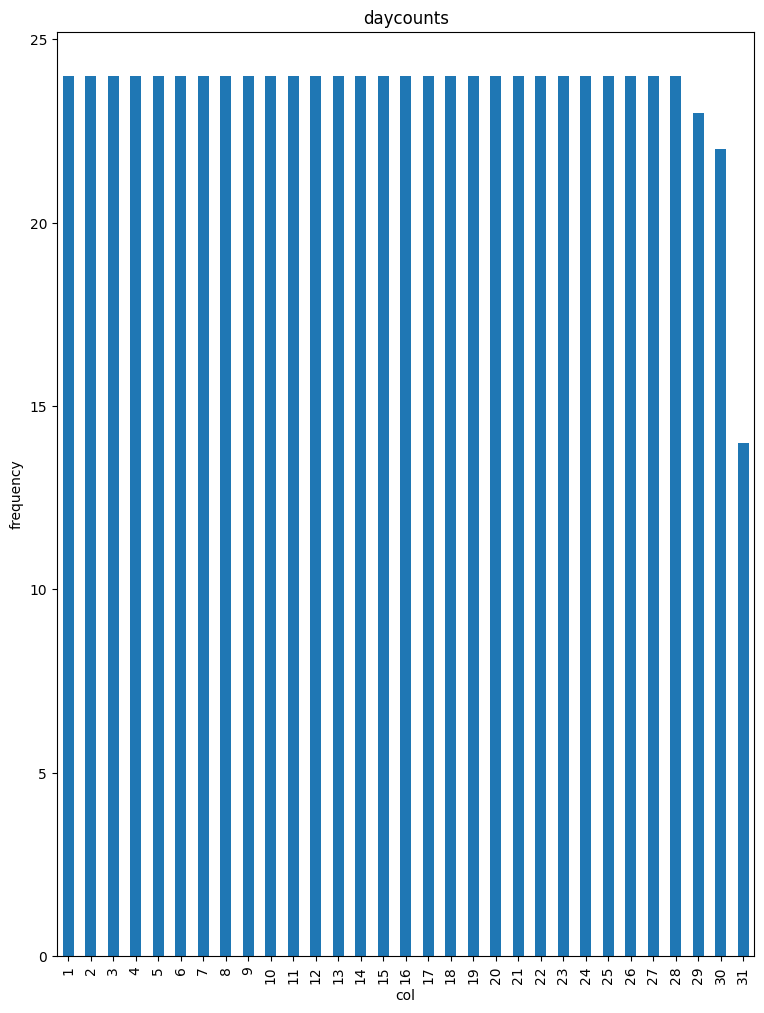

In [7]:
categorical_col = data[['season','yr','mnth','holiday','weekday','workingday','weathersit','day']]

for col in categorical_col:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize = (9,12))
    ax = fig.gca()
    counts.plot.bar(ax = ax)
    ax.set_title(col + 'counts')
    ax.set_xlabel('col')
    ax.set_ylabel('frequency')
    
    fig.show()

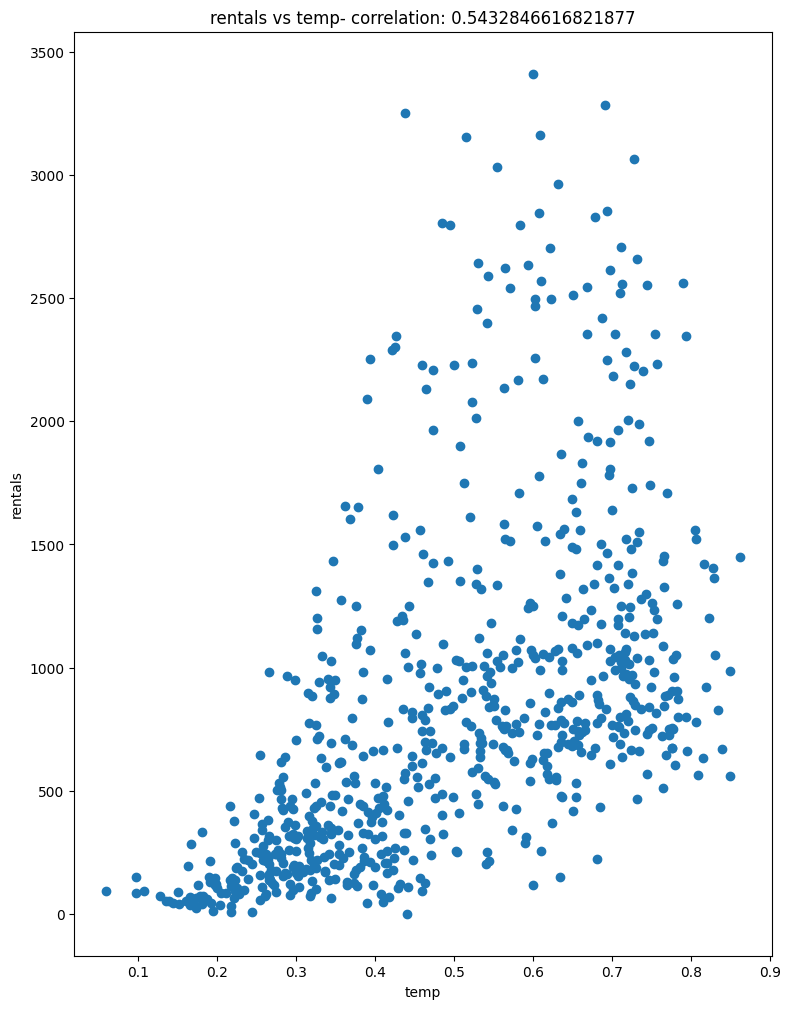

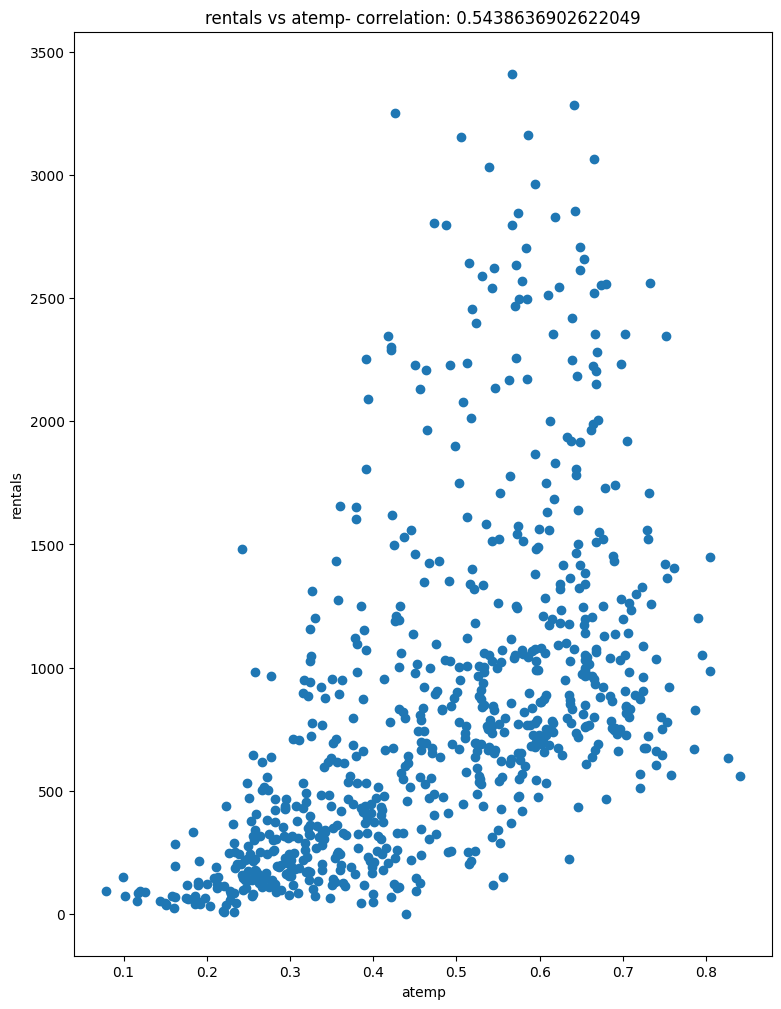

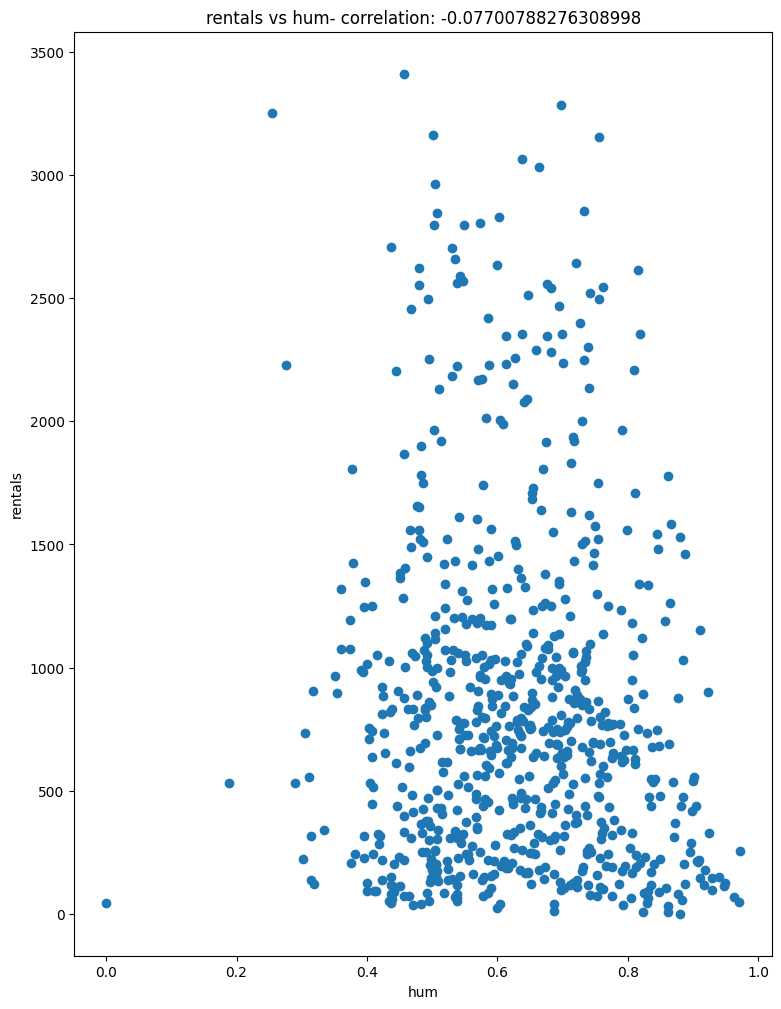

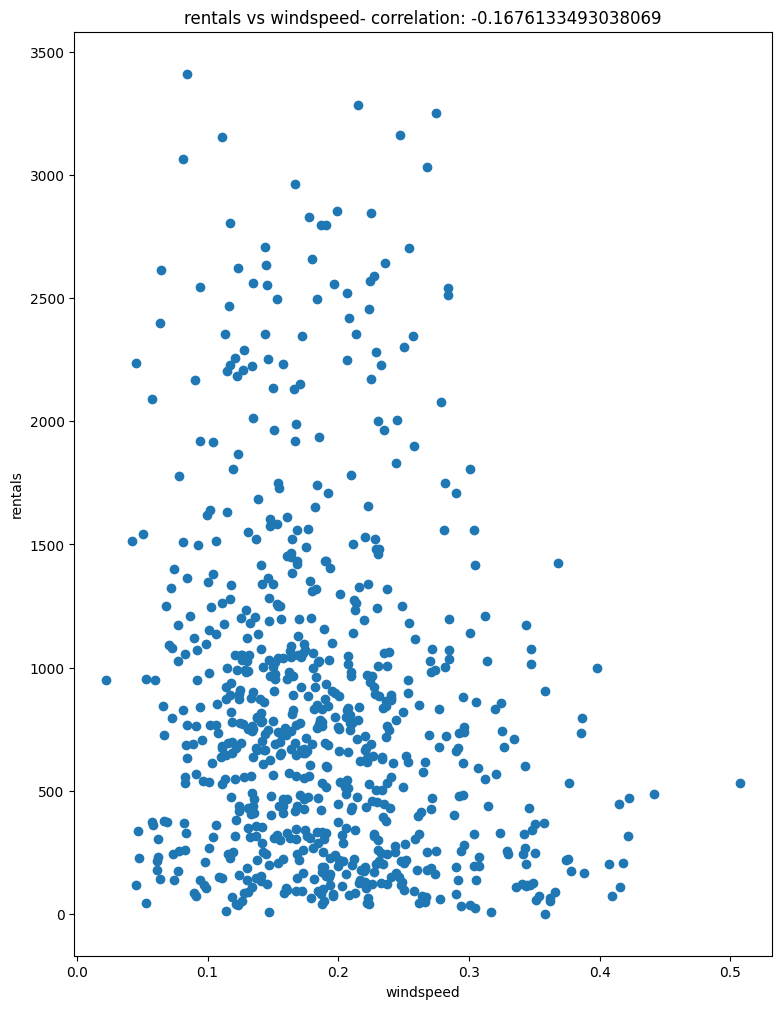

In [8]:
for col in numerical_col:
    fig = plt.figure(figsize = (9,12))
    ax = fig.gca()
    feature = data[col]
    label = data['rentals']
    correlation = feature.corr(label)
    ax.scatter(x= feature, y = label)
    ax.set_xlabel(col)
    ax.set_ylabel('rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
    fig.show()

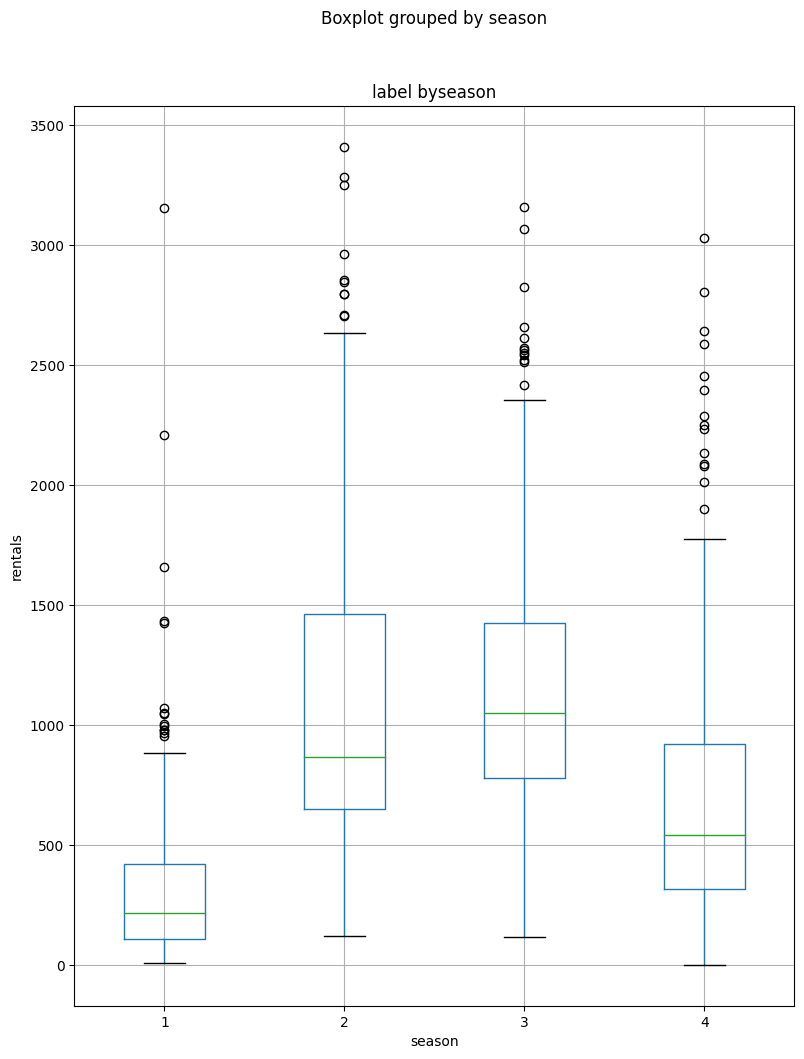

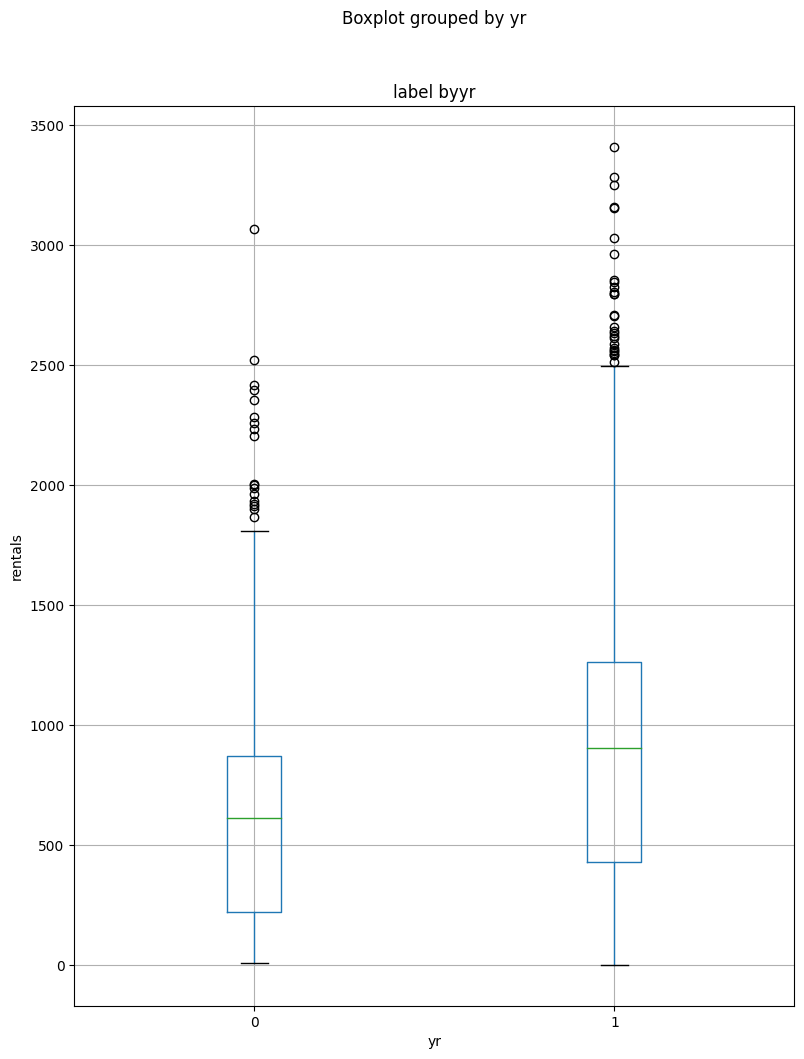

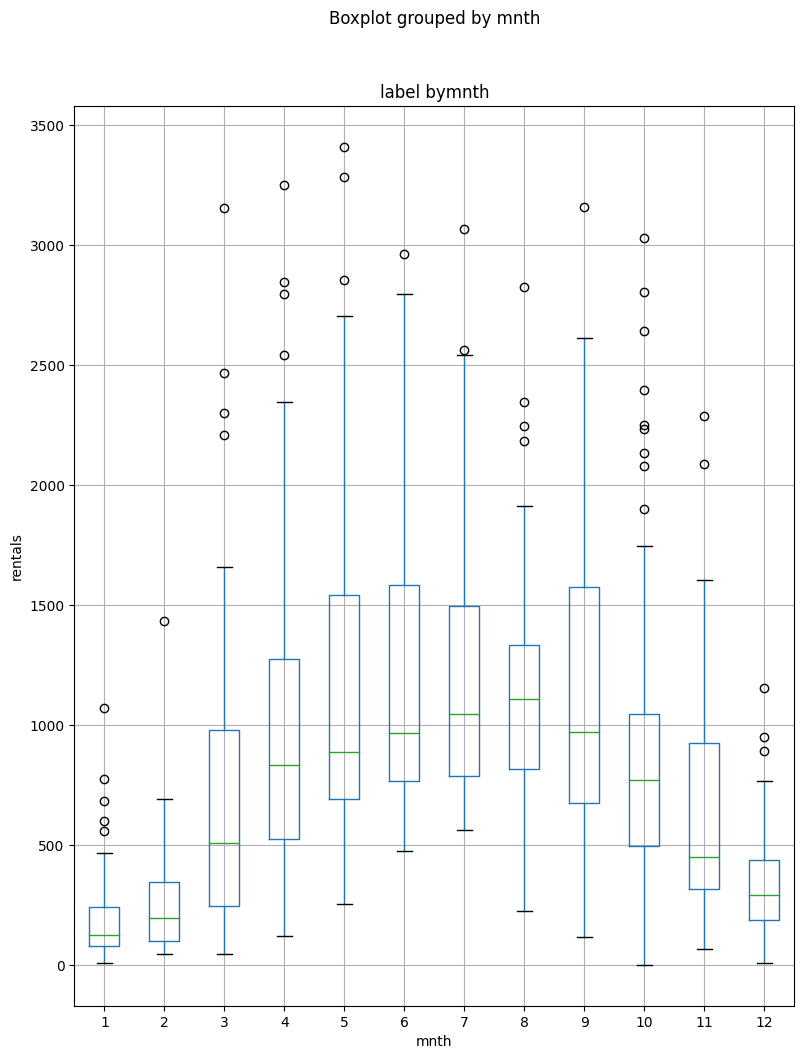

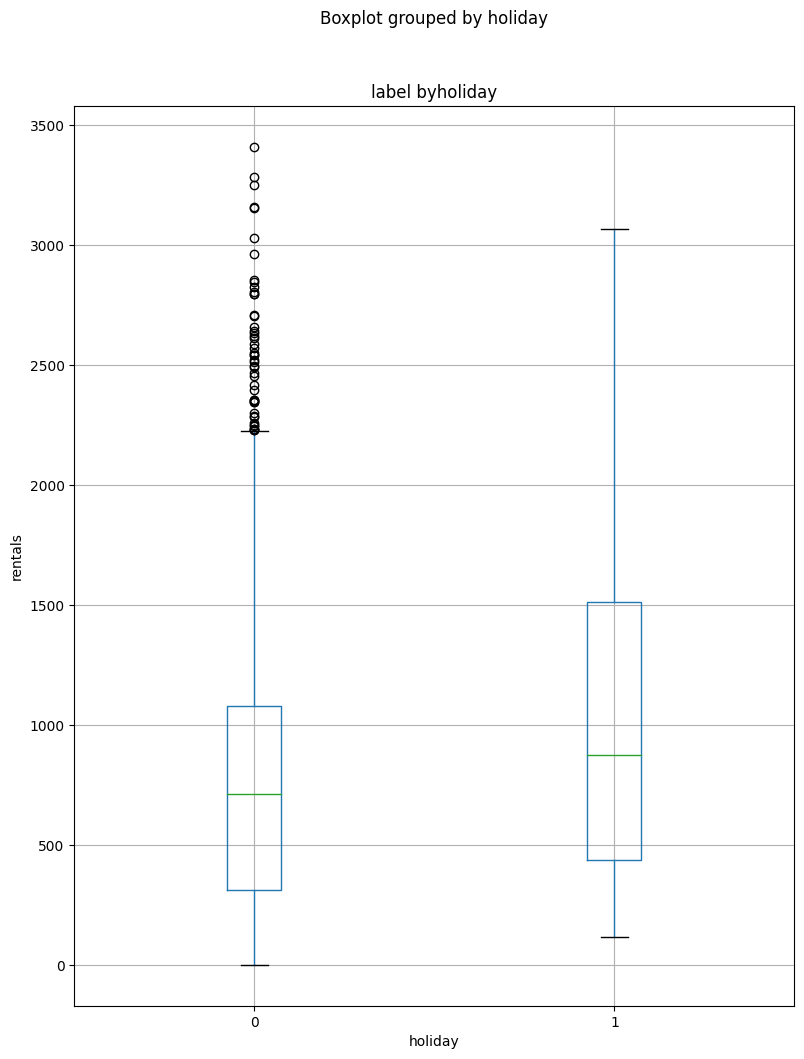

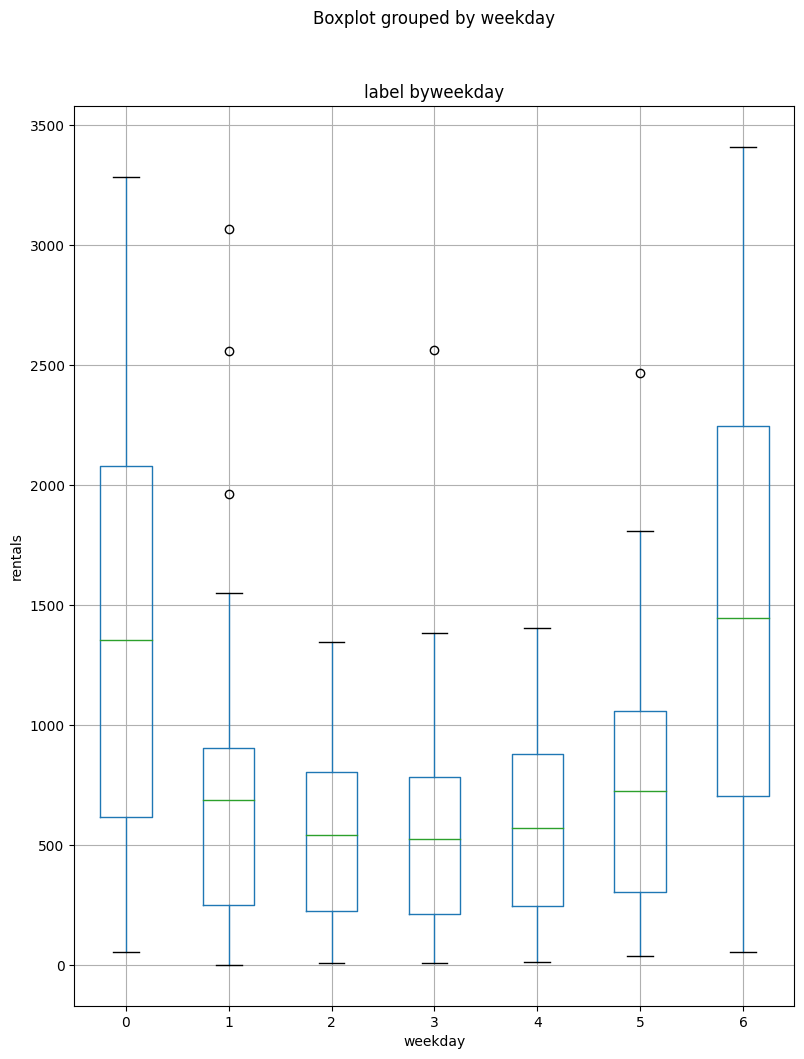

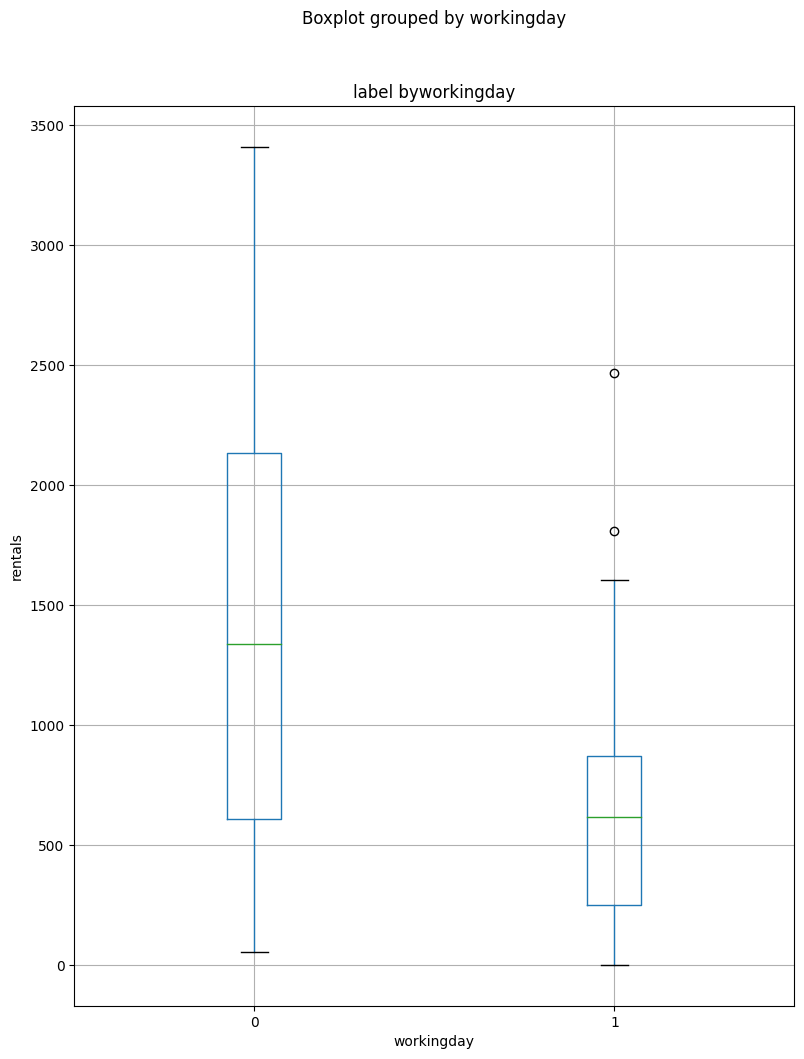

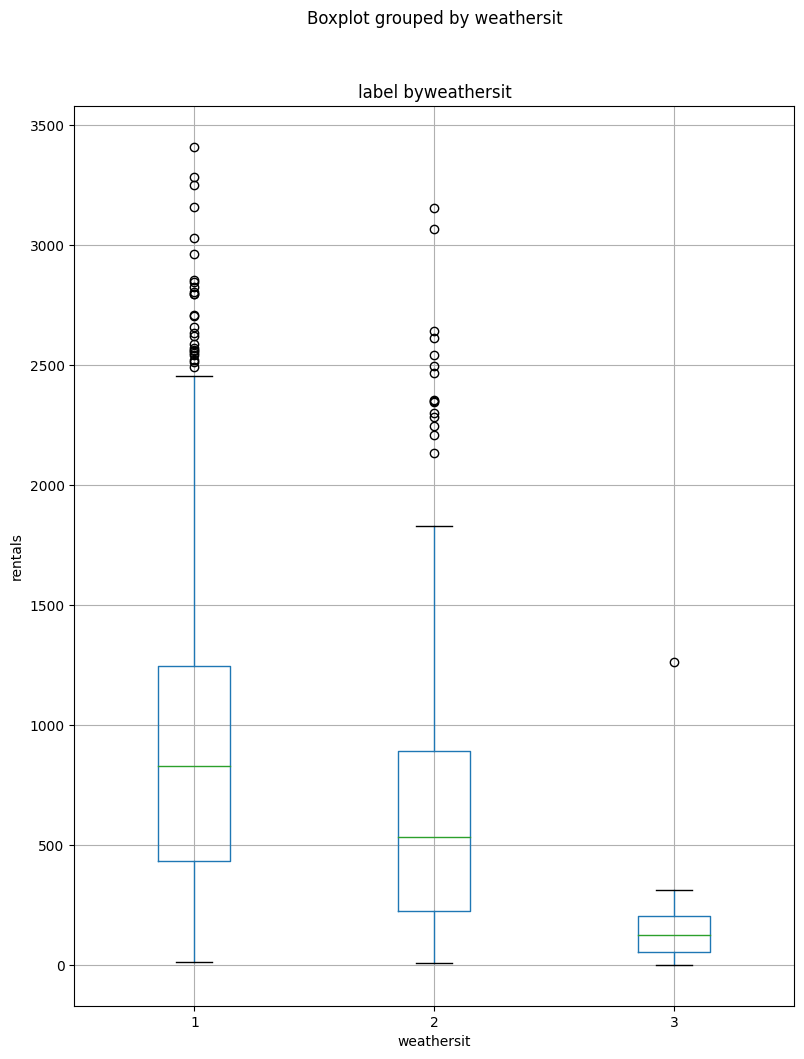

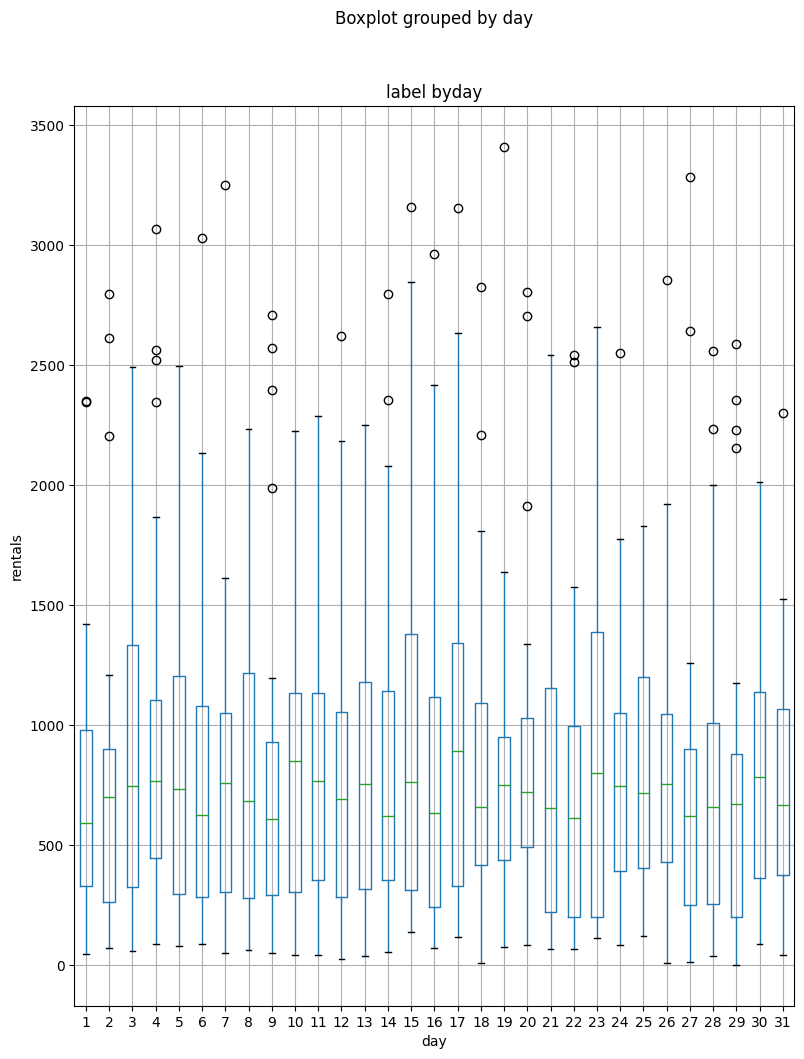

In [9]:
for col in categorical_col:
    fig = plt.figure(figsize=(9,12))
    ax = fig.gca()
    data.boxplot(column = 'rentals',by = col, ax = ax)
    ax.set_title('label by' + col)
    ax.set_ylabel('rentals')
    
    fig.show()

In [10]:
X,y = data[['season','yr','mnth','holiday','weekday','workingday','weathersit','day']],data['rentals']
print('Features:',X[:10],'\nLabels :',y[:10],sep='\n')

Features:
   season  yr  mnth  holiday  weekday  workingday  weathersit  day
0       1   0     1        0        6           0           2    1
1       1   0     1        0        0           0           2    2
2       1   0     1        0        1           1           1    3
3       1   0     1        0        2           1           1    4
4       1   0     1        0        3           1           1    5
5       1   0     1        0        4           1           1    6
6       1   0     1        0        5           1           2    7
7       1   0     1        0        6           0           2    8
8       1   0     1        0        0           0           1    9
9       1   0     1        0        1           1           1   10

Labels :
0    331
1    131
2    120
3    108
4     82
5     88
6    148
7     68
8     54
9     41
Name: rentals, dtype: int64


In [11]:
print("I am a man",'\n','I am Bonsoul Arani', sep='\n')

I am a man


I am Bonsoul Arani


In [12]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.30,random_state=0)
print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 220 rows
Test Set: 511 rows


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [14]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual Labels:',y_test[:10])

Predicted labels:  [1022.  498. 1434.  632. 1002.  596. 1051.  932.  172.  238.]
Actual Labels: 524    1488
12       38
161    1729
556     954
502    1242
473     347
722     408
501     991
159     563
363     491
Name: rentals, dtype: int64


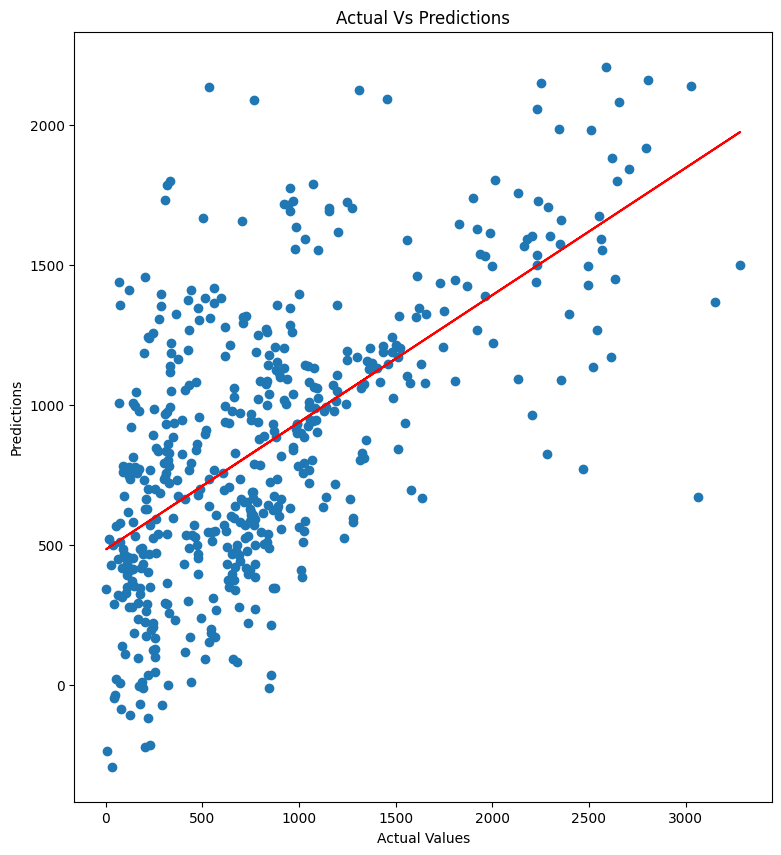

In [15]:

plt.figure(figsize = (9,10))
plt.scatter(y_test,predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Vs Predictions')

z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color = 'red')

# Evalution

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,predictions)
print('MAE :',mae)

mse = mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

r2 = r2_score(y_test,predictions)
print('r2 :', r2)

MAE : 414.6976094802544
MSE : 286279.1131335499
RMSE : 535.0505706319262
r2 : 0.36857117808050377


In [17]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train,y_train)
print(model)

Lasso()


In [18]:
preditictions = model.predict(X_test)

print('Actaul Values :', y_test[:10], '\n','Predictions :',np.round(predictions [:10]))

Actaul Values : 524    1488
12       38
161    1729
556     954
502    1242
473     347
722     408
501     991
159     563
363     491
Name: rentals, dtype: int64 
 Predictions : [1022.  498. 1434.  632. 1002.  596. 1051.  932.  172.  238.]


In [19]:
mae = mean_absolute_error(y_test,predictions)
print('MAE :',mae)

mse = mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('rmse :',rmse)

r2 = r2_score(y_test,predictions)
print('r2 :',r2)

MAE : 414.6976094802544
MSE : 286279.1131335499
rmse : 535.0505706319262
r2 : 0.36857117808050377


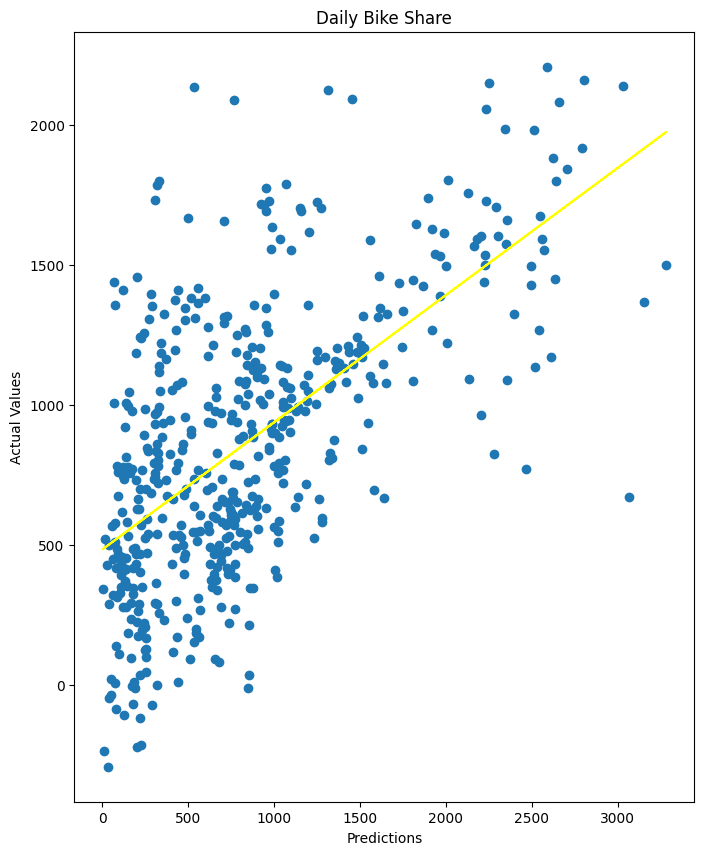

In [20]:
plt.figure(figsize = (8,10))
plt.scatter(y_test,predictions)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Daily Bike Share')

z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color = 'yellow')

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train,y_train)
print(model,'\n')

tree = export_text(model)
#print(tree)

DecisionTreeRegressor() 



In [22]:
predictions = model.predict(X_test)


In [23]:
mae = mean_absolute_error(y_test,predictions)
print('MAE : ',mae)

mse = mean_squared_error(y_test,predictions)
print('MSE :', mse)

rmse = np.sqrt(mse)
print('rmse :', rmse)

r2 = r2_score(y_test,predictions)
print('r2 :',r2)

MAE :  318.42270058708414
MSE : 236638.33659491193
rmse : 486.45486593815866
r2 : 0.4780608879858814


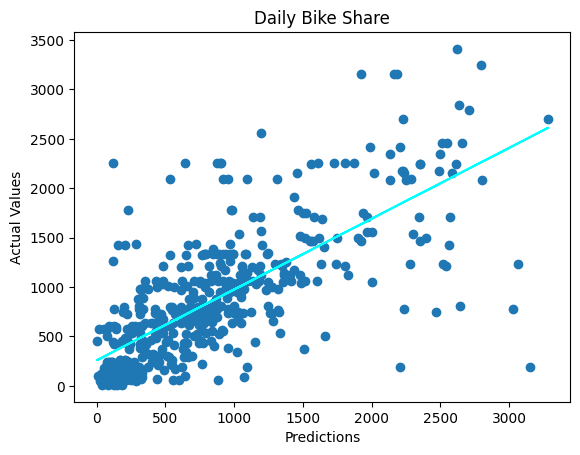

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')

plt.title('Daily Bike Share')

z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),color = 'cyan')

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train,y_train)
print(model)

RandomForestRegressor()


In [26]:
predictions = model.predict(X_test)


In [27]:
mae = mean_absolute_error(y_test,predictions)
print('MAE :',mae)

mse = mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

r2 = r2_score(y_test,predictions)
print('R2 :',r2)


MAE : 249.8517808219178
MSE : 157376.4823616438
RMSE : 396.70704854041077
R2 : 0.6528840481314129


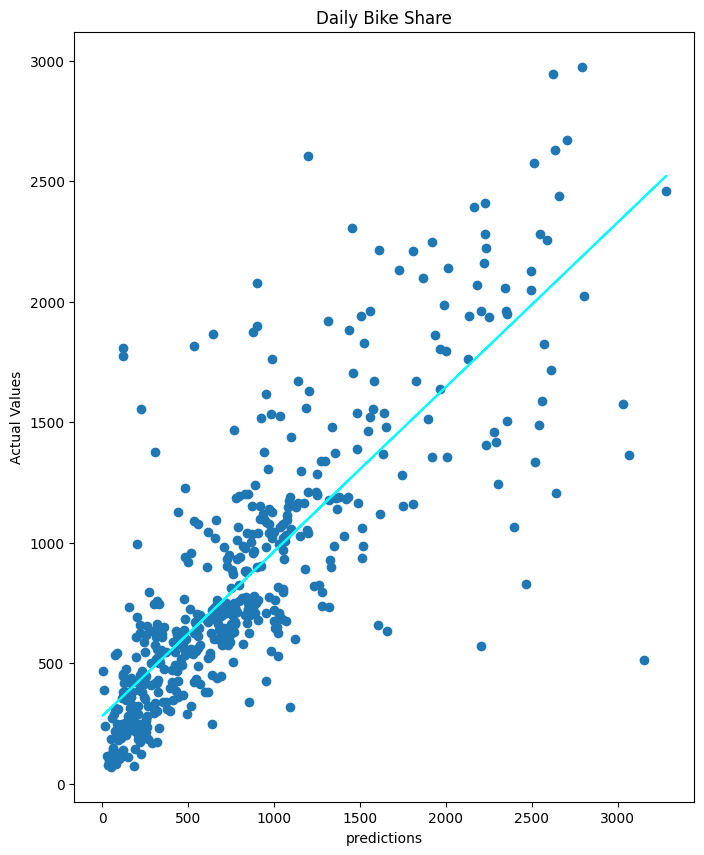

In [28]:
plt.figure(figsize = (8,10))
plt.scatter(y_test,predictions)
plt.xlabel('predictions')
plt.ylabel('Actual Values')

plt.title('Daily Bike Share')

z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),color = 'cyan')

In [29]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

model = GradientBoostingRegressor().fit(X_train,y_train)
print(model, '\n')

GradientBoostingRegressor() 



In [30]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

GradientBoostingRegressor() 

MSE: 179598.6531075399
RMSE: 423.790812910733
R2: 0.6038699271185773


In [31]:
predictions = model.predict(X_test)


mae = mean_absolute_error(y_test,predictions)
print('MAE :',mae)

mse = mean_squared_error(y_test,predictions)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

r2 = r2_score(y_test,predictions)
print('r2 :', r2)

MAE : 272.10734350760833
MSE : 179598.6531075399
RMSE : 423.790812910733
r2 : 0.6038699271185773


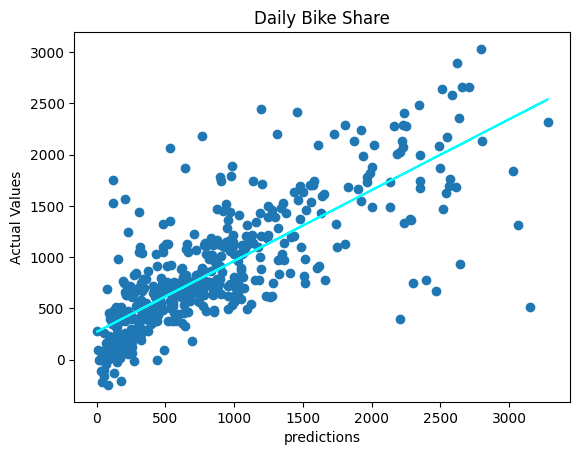

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('predictions')
plt.ylabel('Actual Values')

plt.title('Daily Bike Share')

z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),color = 'Cyan')

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 



Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 179367.9614347072
RMSE: 423.5185491034687
R2: 0.6043787500278317


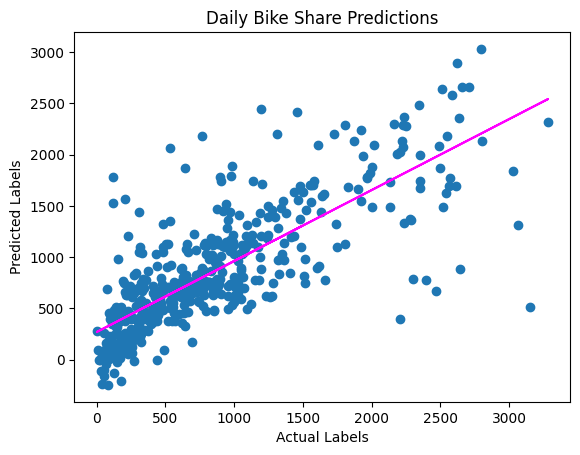

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()